# Heap Sort

# What Is Heap Sort ?

#### Heap sort is a comparison-based sorting technique based on Binary Heap data structure. It is similar to selection sort where we first find the minimum element and place the minimum element at the beginning. We repeat the same process for the remaining elements.[1]

In [87]:
def siftDown(List, parent, end):
    """L[parent:end+1] should almost be a max heap.
       siftDown repairs it so that it is one."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # While parent is actually a parent (has at least a left child).
    while 2*parent + 1 <= end:
        # The indices of the children of parent.
        lchild = 2 * parent + 1
        rchild = 2 * parent + 2
        
        # Assume the parent is larger than the children.
        swap = parent
        
        # Is the parent smaller than the left child?
        if List[swap] < List[lchild]:
            
            # Then swap is set to index of left child.
            swap = lchild
            
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
            
        # Check if right child exists and is smaller than L[swap].
        if rchild <= end and List[swap] < List[rchild]:
            # Then swap is set to index of right child.
            swap = rchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # We have a max heap if the parent is bigger than the children.
        if swap == parent:
            break 
        else:
            # Swap the parent with the bigger child.
            List[parent], List[swap] = List[swap], List[parent]
            # Set parent to bigger child's index.
            parent = swap
    
    # Return the number of comparisons.
    return no_comparisons

In [88]:
def heapsort(List):
    """Sorts the list List in-place using Heap Sort."""
    
    # Keep track of the number of comparisons.
    comparisons = 0
    
    # Turn the list into a max heap.
    # get the position of the last element.
    last_element = len(List) - 1
    
    # Find the last parent.
    last_parent = (last_element - 1) // 2
    
    # Loop backwards through all parents.
    for parent in range(last_parent, -1, -1):
        # Sift down.
        no_comparisons = comparisons + siftDown(List, parent, last_element)

    # Segregate the list L into two parts:
    #   1. L[:end] is a max heap
    #   2. Each element beyond end is greater than everything before it.
    # While there are still elements in the heap.
    
    for end in range(last_element, 0, -1):
        
        # Swap the element at index 0 with the element at index end.
        List[0], List[end] = List[end], List[0]
        
        # Fix the heap - the root is currently out of place.
        comparisons = comparisons + siftDown(List, 0, end - 1)
    
    # Return the number of comparisons.
    return comparisons

## Populate List

In [89]:
List=[1,5,7,8,12,45,78,90,17,86]
List

[1, 5, 7, 8, 12, 45, 78, 90, 17, 86]

## Passing list List into heapsort algrothim 

In [90]:
heapsort(List)
List

[1, 5, 7, 8, 12, 17, 45, 78, 86, 90]

In [91]:
List

[1, 5, 7, 8, 12, 17, 45, 78, 86, 90]

## Visualisation

### imports

In [92]:
# Plotting
import matplotlib.pyplot as plt

# Graphs.
import networkx as nx

# Change default plot size.
plt.rcParams["figure.figsize"] = (20, 8)

# Math functions.
import math

# Numerical functions.
import numpy as np

# Set up the random number generator
rng = np.random.default_rng(seed=0)

#create a random list of ints
List = [1,5,7,8,12,45,78,90,17,86,36,48,28,11,39]
List


[1, 5, 7, 8, 12, 45, 78, 90, 17, 86, 36, 48, 28, 11, 39]

In [93]:
def drawtree(List, highlight=None):
    
  # Create a fully balanced binary tree.
  T = nx.balanced_tree(2, math.floor(math.log(len(List), 2)))
    
  # Remove nodes beyond the length of List.
  T.remove_nodes_from(list(T.nodes)[len(List):])
    
  # Relabel the nodes with elements of L.
  T = nx.relabel_nodes(T, dict(zip(T.nodes, List)), copy=True)
    
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
    
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='red', node_size=1600, font_size=32)
    
  # Highlight nodes if needed.
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=2600, font_size=32)

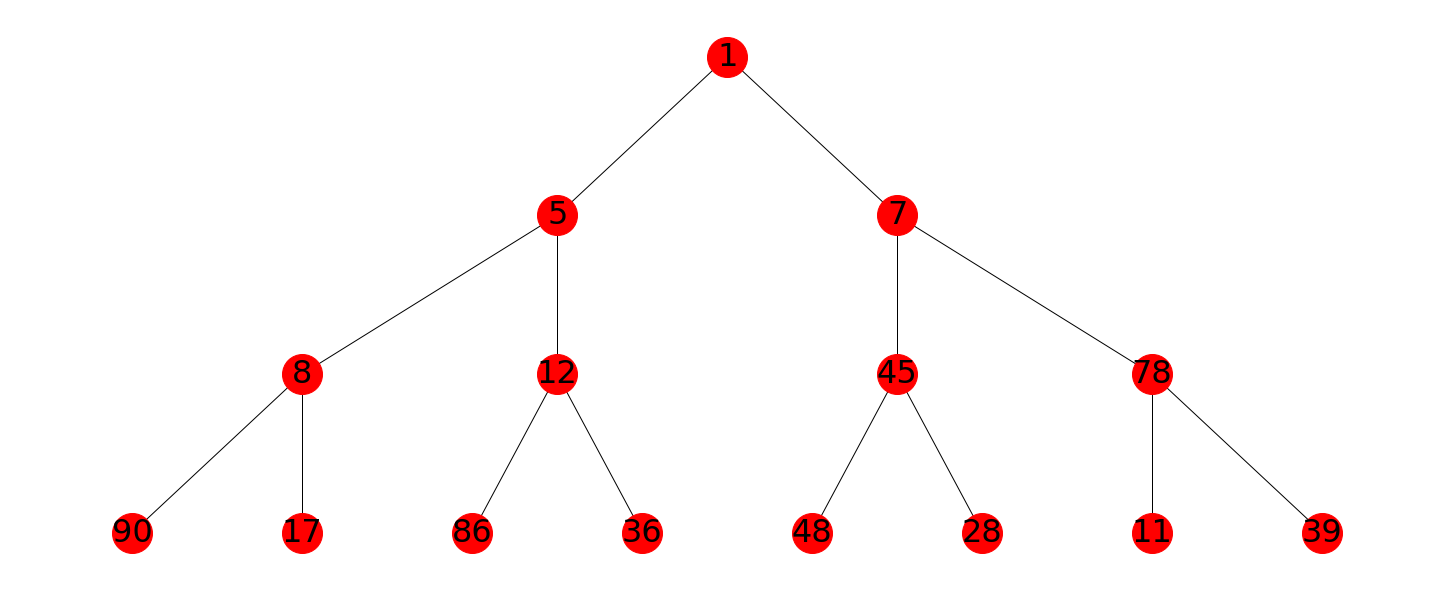

In [94]:
drawtree(List)

In [103]:
newList= list(rng.permutation(20))
newList

[19, 0, 6, 8, 7, 1, 5, 4, 14, 15, 18, 10, 16, 2, 9, 3, 12, 13, 11, 17]

## Before Heap Sort

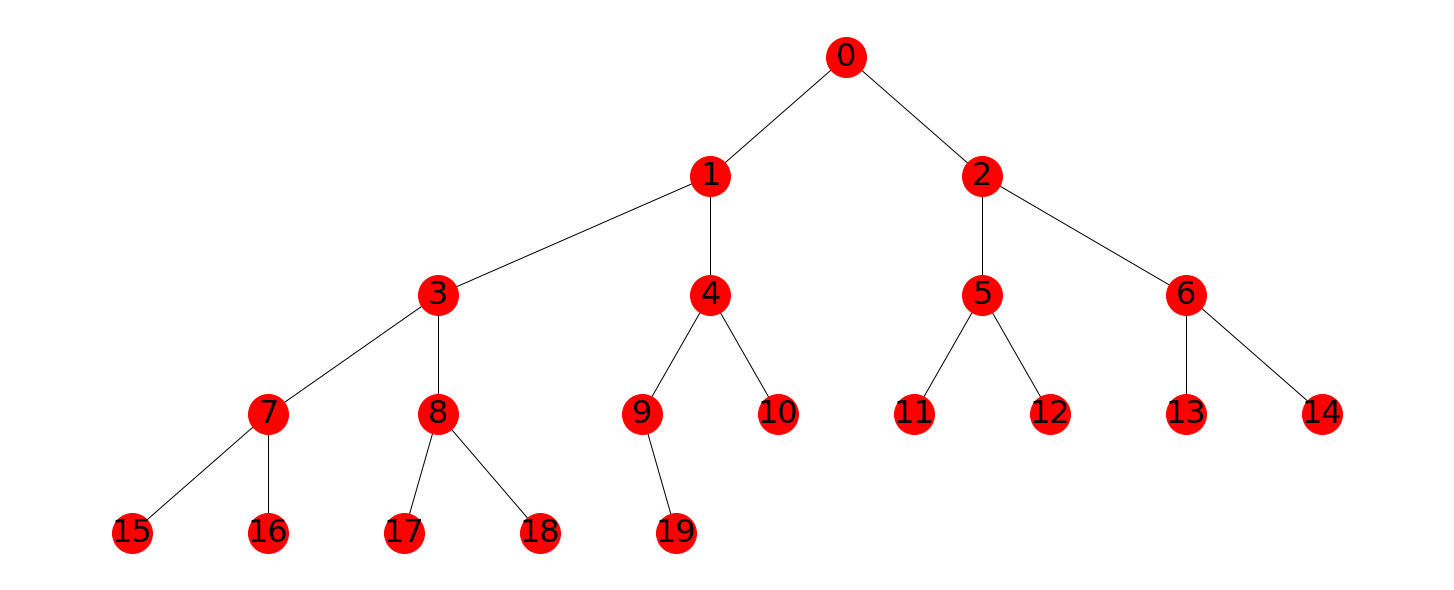

In [107]:
drawtree(newList)

In [105]:
heapsort(newList)
newList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

# After Heap Sort

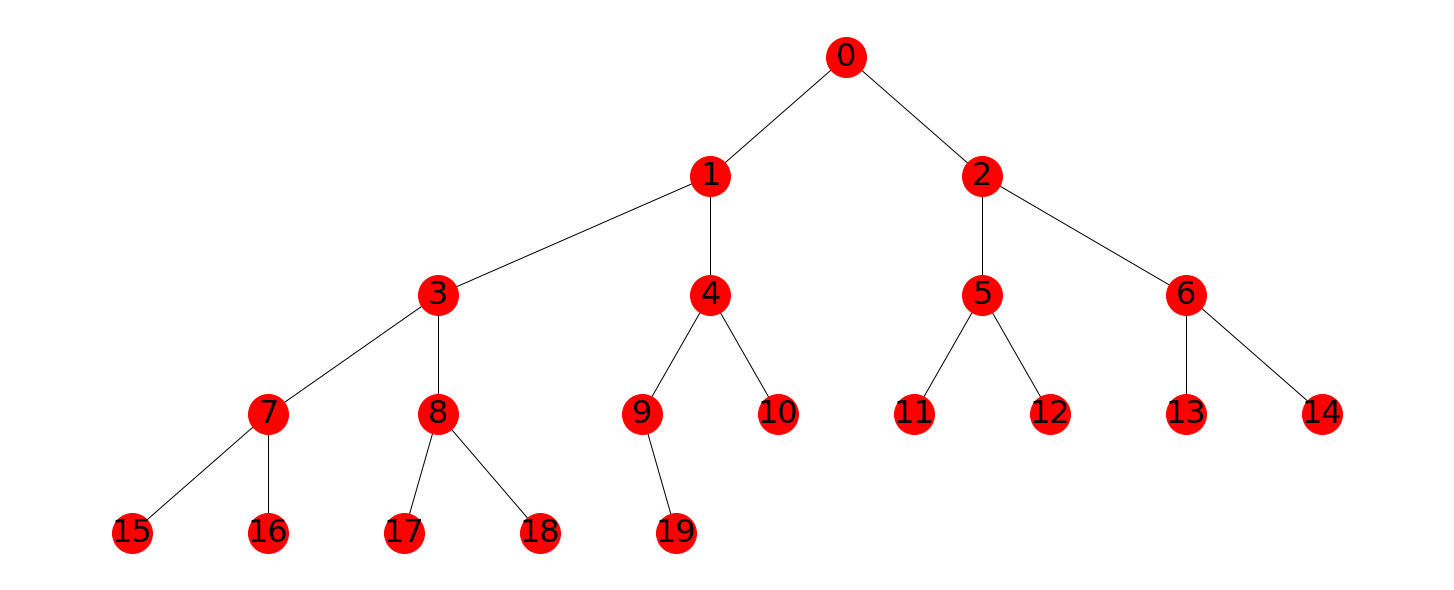

In [108]:
drawtree(newList)